# Improved Convolutional Neural Network to Classify Images from CIFAR10 Database

### 1. Load CIFAR10 Dataset

CIFAR10 is one of the most famous datasets in the field of machine learning
 - It has 60,000 images
 - Very straight forward to download
 - Images dimensions are 32x32
 - Colour images
 - 10 classes

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### 2. Data Visualization

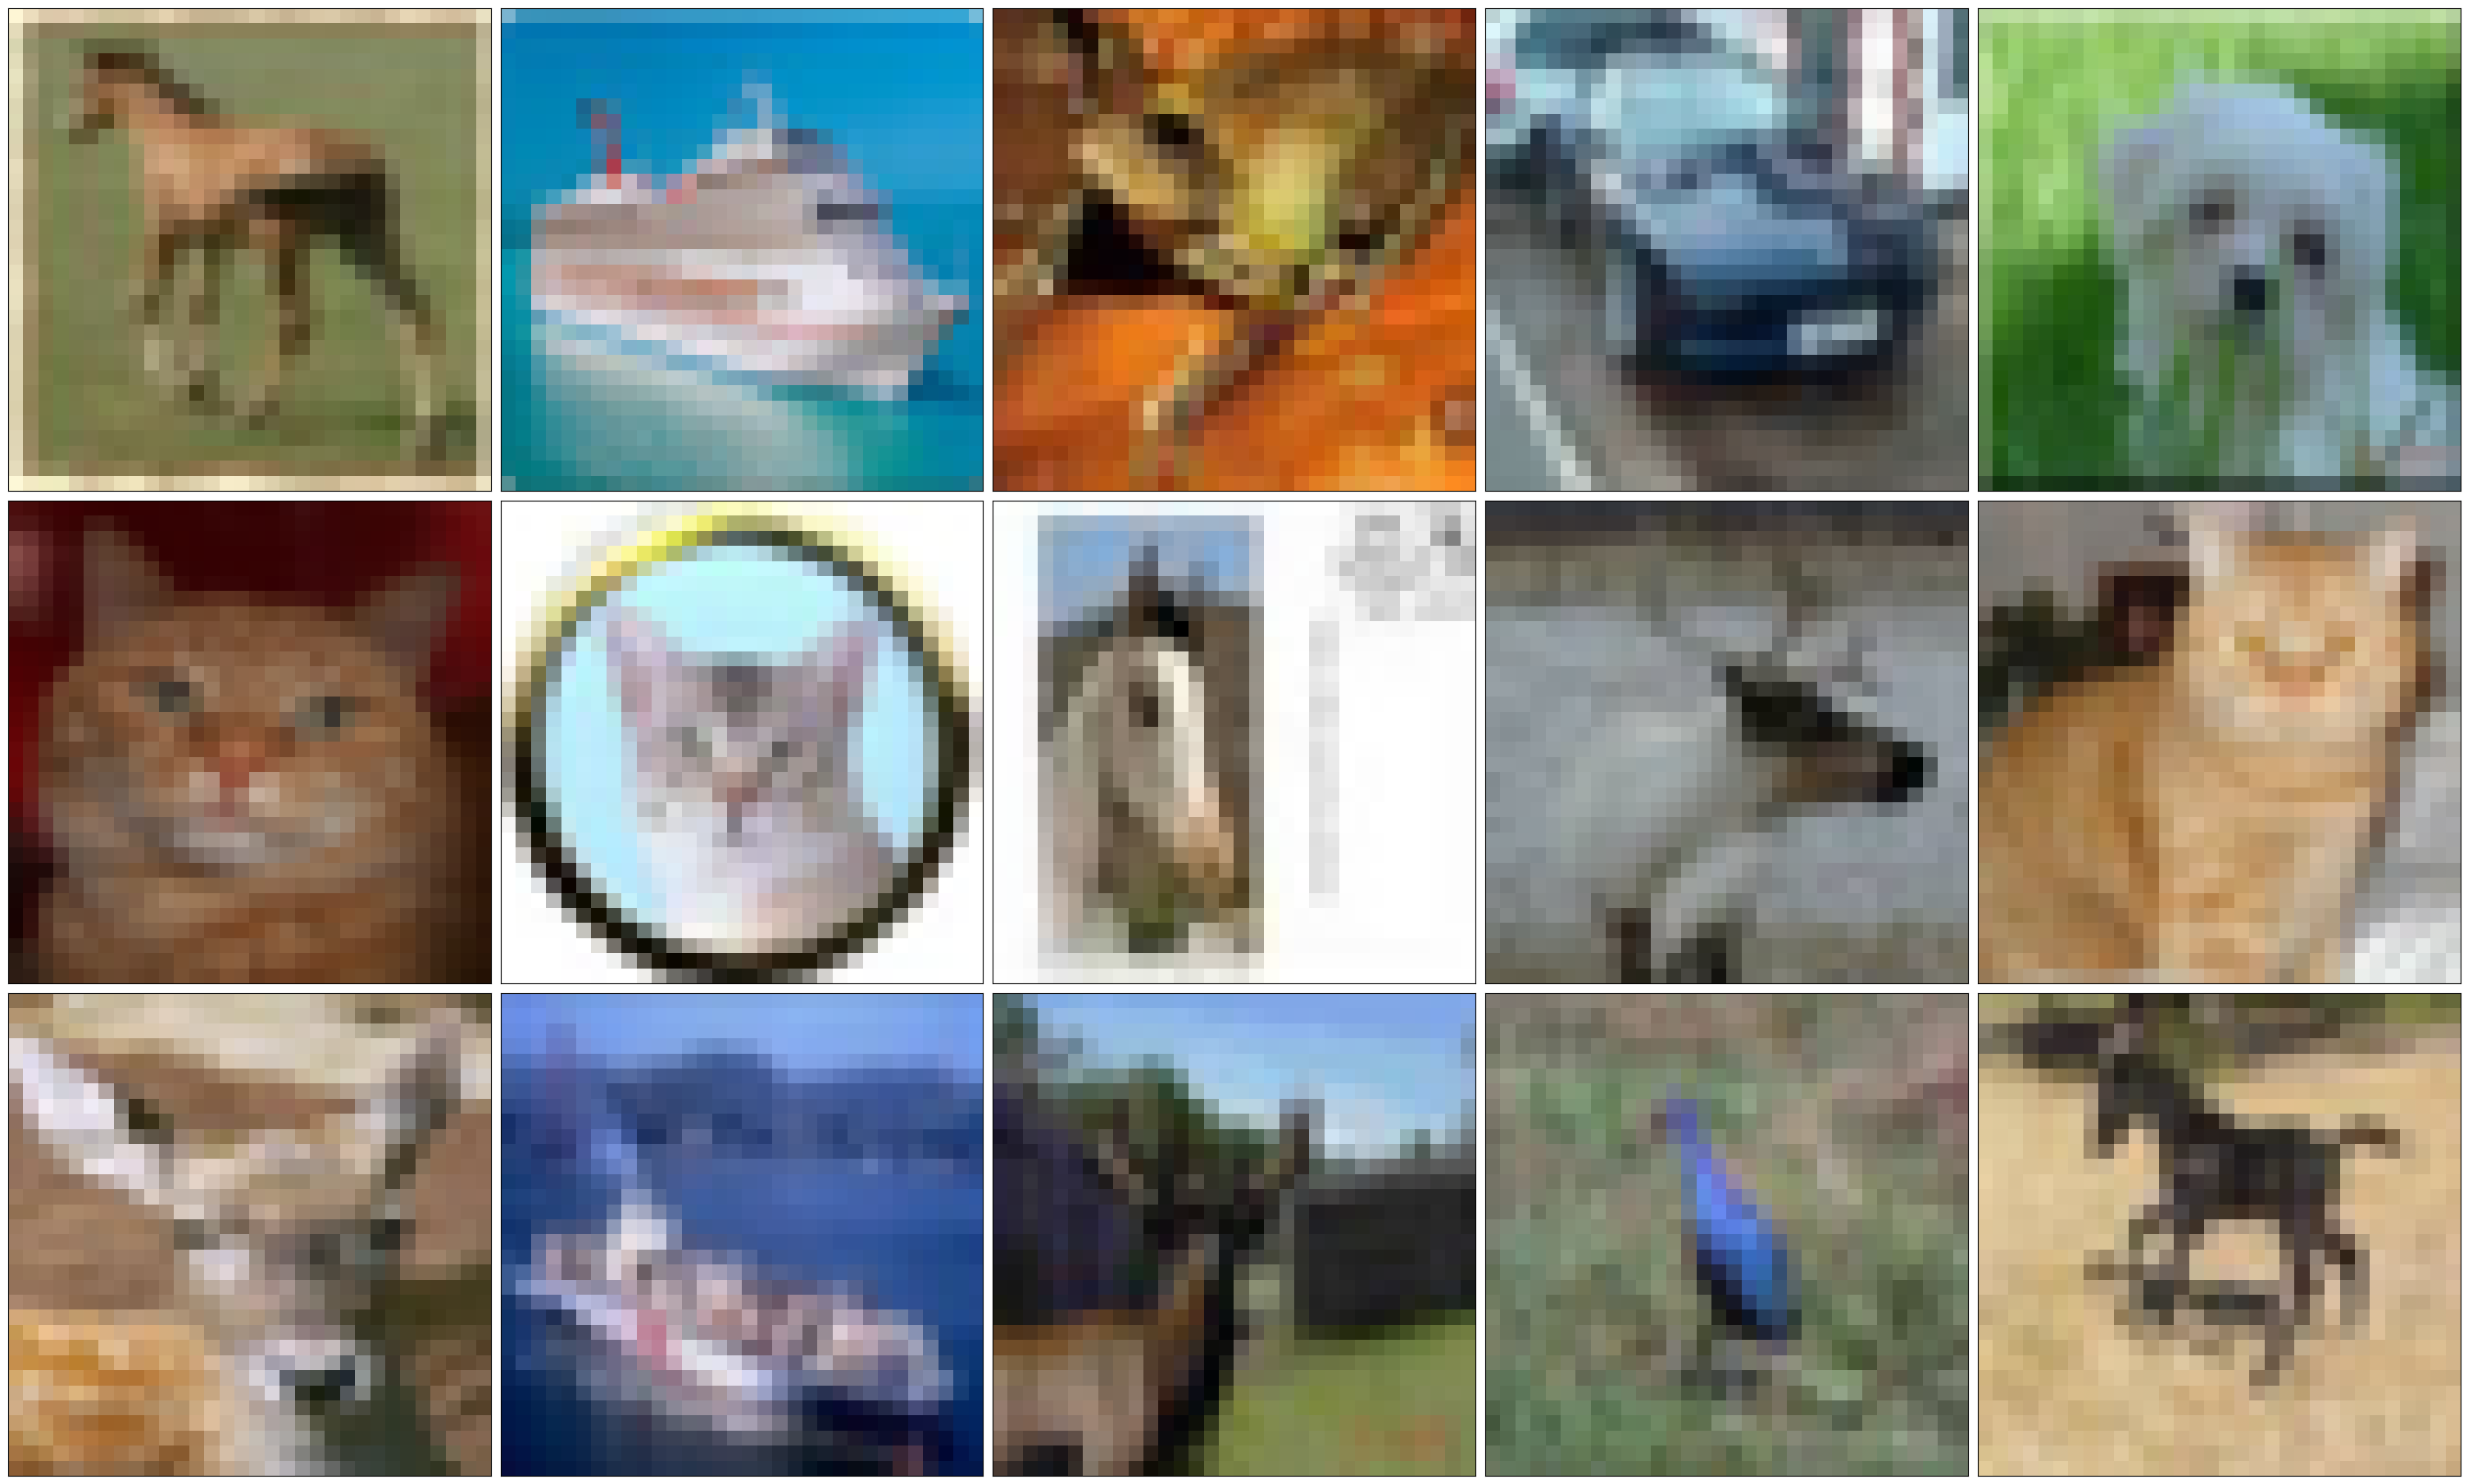

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3,5,layout='constrained',figsize=(30,18))
for i,j in enumerate(np.random.choice(x_train.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_train[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
 
plt.show()

### 3. Split Data (validation data)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train, x_valid = x_train[5000:], x_train[:5000]
y_train, y_valid = y_train[5000:], y_train[:5000]

print("x_train shape:",x_train.shape)
print("x_valid shape:",x_valid.shape)
print("x_test shape:",x_test.shape)

x_train shape: (45000, 32, 32, 3)
x_valid shape: (5000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


### 4. Normalize Data

In [6]:
mean = np.mean(x_train, axis=(0,1,2,3))
std = np.std(x_train, axis=(0,1,2,3))

x_train = (x_train-mean)/(std+1e-7)
x_valid = (x_valid-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)

### 5. One-Hot Encoding for Labels

In [7]:
from tensorflow.keras.utils import to_categorical

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_valid = to_categorical(y_valid, num_classes)
y_test = to_categorical(y_test, num_classes)

### 6. Data Augmentation

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

datagen = ImageDataGenerator(rotation_range=15, height_shift_range=0.1,
                             width_shift_range=0.1, horizontal_flip=True,
                             vertical_flip=False)

datagen.fit(x_train)

### 7. Model Architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Activation
from tensorflow.keras import regularizers, optimizers

base_hidden_units = 32
weight_decay = 1e-4
model = Sequential()

#CONV1
model.add(Conv2D(base_hidden_units, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(weight_decay),
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

#CONV2
model.add(Conv2D(base_hidden_units, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.2))

#CONV3
model.add(Conv2D(base_hidden_units * 2, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#CONV4
model.add(Conv2D(base_hidden_units * 2, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.3))

#CONV3
model.add(Conv2D(base_hidden_units * 4, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#CONV4
model.add(Conv2D(base_hidden_units * 4, kernel_size=3, strides=1, padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# POOL + Dropout
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(rate=0.4))

#FC7
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

### 8. Compile the Model and Train

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint
import keras

batch_size = 32
epochs = 5

checkpointer = ModelCheckpoint(filepath='best_weights/cifar10_cnn_improved.model.weights.best.keras', verbose=1, save_best_only=True)

# optimizer = keras.optimizers.Adam(learning_rate=0.0005,weight_decay=1e-6)
optimizer = keras.optimizers.RMSprop(learning_rate=0.0003,weight_decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

hist = model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), epochs=epochs, validation_data=(x_valid, y_valid),
                           steps_per_epoch=x_train.shape[0] // batch_size, callbacks=[checkpointer], verbose=2, shuffle=True)

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.06686, saving model to cifar10_cnn_improved.model.weights.best.keras
1406/1406 - 108s - 77ms/step - accuracy: 0.5937 - loss: 1.2304 - val_accuracy: 0.6542 - val_loss: 1.0669
Epoch 2/5


2024-05-20 14:17:37.512811: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 2: val_loss improved from 1.06686 to 1.01352, saving model to cifar10_cnn_improved.model.weights.best.keras
1406/1406 - 3s - 2ms/step - accuracy: 0.6250 - loss: 1.2356 - val_accuracy: 0.6696 - val_loss: 1.0135
Epoch 3/5

Epoch 3: val_loss improved from 1.01352 to 0.92616, saving model to cifar10_cnn_improved.model.weights.best.keras
1406/1406 - 111s - 79ms/step - accuracy: 0.6434 - loss: 1.0913 - val_accuracy: 0.6952 - val_loss: 0.9262
Epoch 4/5


2024-05-20 14:19:31.612997: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]



Epoch 4: val_loss did not improve from 0.92616
1406/1406 - 3s - 2ms/step - accuracy: 0.6250 - loss: 1.1402 - val_accuracy: 0.7016 - val_loss: 0.9265
Epoch 5/5

Epoch 5: val_loss did not improve from 0.92616
1406/1406 - 107s - 76ms/step - accuracy: 0.6688 - loss: 1.0043 - val_accuracy: 0.6734 - val_loss: 1.0600


### 9. Load Best Weights

In [13]:
model.load_weights('best_weights/cifar10_cnn_improved.model.weights.best.keras')

### 10. Accuracy on Test Set

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f"Test Loss: {round(100*score[0],4)}%\nTest Accuracy: {round(100*score[1],4)}%")

Test Loss: 96.608%
Test Accuracy: 69.18%


### 11. Visualize Some Predicitions

In [15]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


In [16]:
y_hat[0]

array([7.2434605e-03, 4.2401676e-04, 3.9204573e-03, 4.6412027e-01,
       2.1987590e-04, 1.6038701e-02, 3.9055035e-02, 4.0644878e-05,
       4.0322080e-01, 6.5716729e-02], dtype=float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

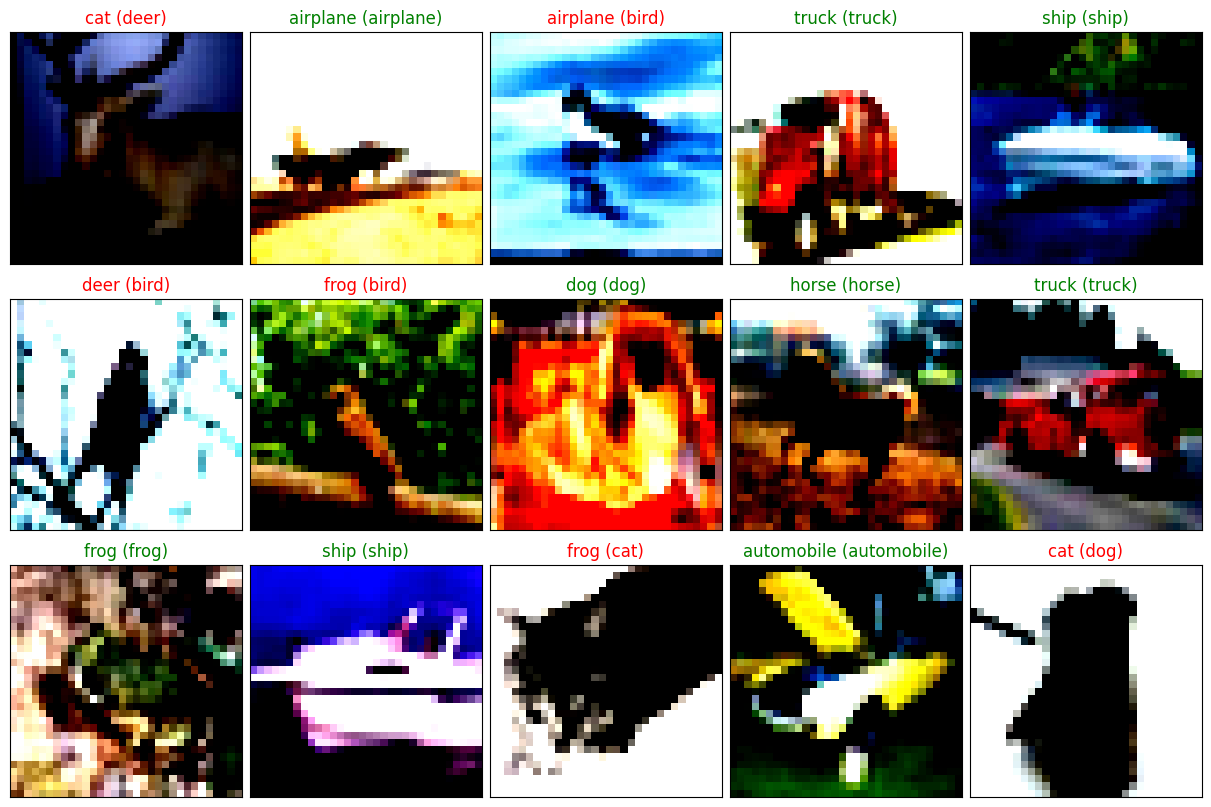

In [18]:
fig, axs = plt.subplots(3,5,layout='constrained',figsize=(12,8))
for i,j in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    axs.flat[i].imshow(x_test[j])
    axs.flat[i].tick_params(left=False,bottom=False,labelleft=False,labelbottom=False)
    pred_idx = np.argmax(y_hat[j])
    true_idx = np.argmax(y_test[j])
    axs.flat[i].set_title("{0} ({1})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                          color='green' if pred_idx == true_idx else 'red')

### 13. Accuracy Curves

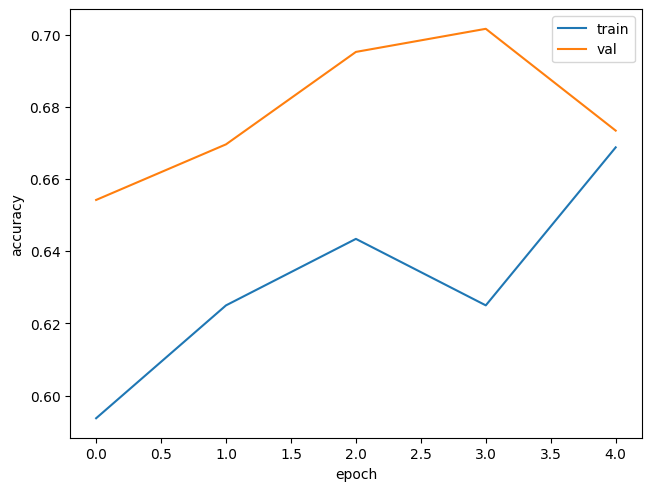

In [19]:
fig, ax = plt.subplots(1,1,layout='constrained')
ax.plot(hist.history['accuracy'], label='train')
ax.plot(hist.history['val_accuracy'], label='val')
ax.legend()
ax.set_xlabel('epoch')
ax.set_ylabel('accuracy')

plt.show()

In [69]:
type(hist.history)

dict